# Lead Scoring Case Study
With the historic data available for conversion of leads from all prospects obtained from different sources, <b>current conversion rate is close to 30%</b>. We need to create an algorithm to identifying hot leads from all prospects so that overall <b>conversion rate increases to 80%</b>. Also, <i><b>identify most significant features or criterias impacting leads conversion.</i></b>

## Importing Historic Data 

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Increase display extent
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# Changing root directory
import os
os.chdir("C:/Users/rahulp/Desktop/Mysql installer/Machine Learning/Logistic Regression/Lead Scoring Assignment/")

In [5]:
# Importing datasets
path = "Leads.csv"
df_leads = pd.read_csv(path)
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#Importing Data Dictionary
dictionary_path = "C:/Users/rahulp/Desktop/Mysql installer/Machine Learning/Logistic Regression/Lead Scoring Assignment/Leads Data Dictionary.xlsx"
# df_leads_dictionary = pd.read_excel(dictionary_path, )
df_leads_dictionary = pd.read_excel(dictionary_path, sheet_name="Sheet1", usecols="B:C", skiprows=2)
df_leads_dictionary.head()

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identif...
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,The origin identifier with which the customer ...
3,Lead Source,"The source of the lead. Includes Google, Organ..."
4,Do Not Email,An indicator variable selected by the customer...


## Inspecting the source data

In [7]:
# Shape of available data
df_leads.shape

(9240, 37)

In [8]:
# Statistical aspects of data
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


It depicts <b>outliers</b> present for features <b>TotalVisits, Total Time Spent on Website and Page Views Per Visit</b> as there is lot of difference between 75% and max value 

In [9]:
# Lets look at general information
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Out of total <b>36 independent feature + 1 dependent feature, we have 5 numerical features and 29 categorical features present</b>. <br>Ignoring 3 other feature (ignoring LeadNumber as it is just a internal count record identifying each lead, ignoring Prospoect ID as it connects every lead to existing customer, ignoring prediction feature Converted) <br> There are many features for which <b>missing data treatment will be needed</b>

## Data preparation & cleaning

Dropping Id features

In [10]:
# dropping feature LeadNumber & Prospect ID
df_leads_cleaned = df_leads.drop(columns=['Prospect ID'], axis=1)
df_leads_cleaned.shape

(9240, 36)

In [11]:
# looking at all available values for each categorical feature
cat_ftrs = list((df_leads_cleaned.select_dtypes(include=["object_"])).columns)
len(cat_ftrs)

29

In [12]:
for feature in cat_ftrs:
    print(feature)
    print(df_leads_cleaned[feature].value_counts())
    print()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64

Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64

Last Activity
Email Opened                    3437
SMS Sent     

Dropping features with same value throughout

In [13]:
# dropping features which have same value throughout data
drop_col_list = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
df_leads_cleaned.drop(columns=drop_col_list, inplace=True)
cat_ftrs = [col for col in cat_ftrs if col not in drop_col_list]
print(len(cat_ftrs))

24


Replacing "Select" with Null

In [14]:
# replacing features having Select value with Null as those are actually Nulls as per problem statement and business understanding
for feature in cat_ftrs:
    df_leads_cleaned[feature] = np.where(df_leads_cleaned[feature] == "Select", np.NaN, df_leads_cleaned[feature])

Deleting missing data considering threshold 60%

In [15]:
# lets look at percentage of missing data for each feature
mssng_data = pd.DataFrame(round(100*(df_leads_cleaned.isnull().sum()/len(df_leads_cleaned.index)), 2)).reset_index()
mssng_data.columns = ['Column_name','percentage_missing']
mssng_data

,Column_name,percentage_missing
0,Lead Number,0.00
1,Lead Origin,0.00
2,Lead Source,0.39
3,Do Not Email,0.00
4,Do Not Call,0.00
5,Converted,0.00
6,TotalVisits,1.48
7,Total Time Spent on Website,0.00
8,Page Views Per Visit,1.48
9,Last Activity,1.11


In [16]:
# Considering 60% threshold criteria there are two features which can be dropped that is Lead Profile and How did you hear about X Education. But both seems like a significant feature so keeping that for now.

Dropping features with majority same value accross data (Threshold 98%)

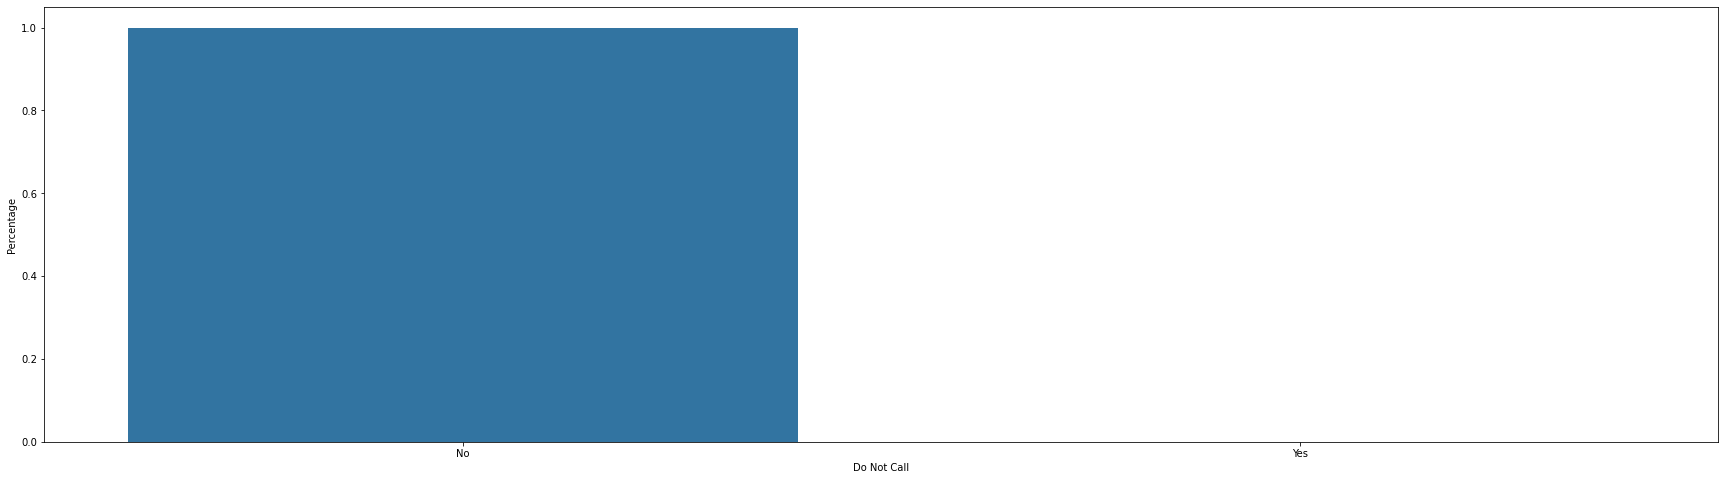

value share for Do Not Call


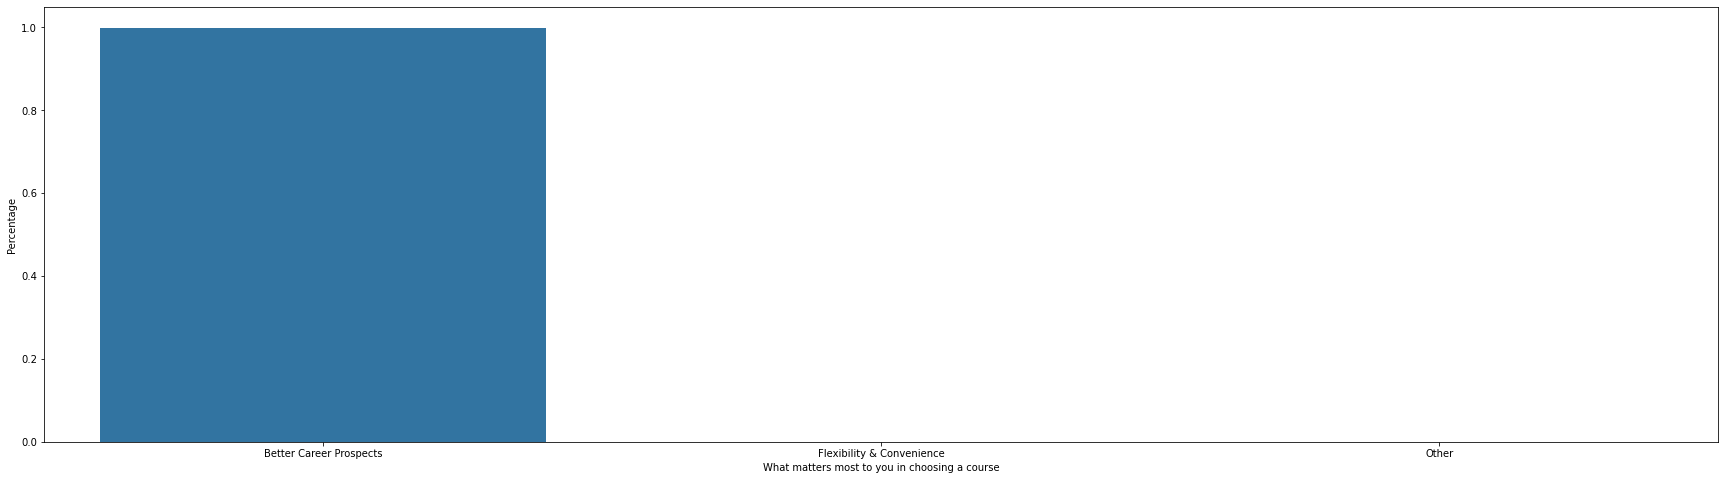

value share for What matters most to you in choosing a course


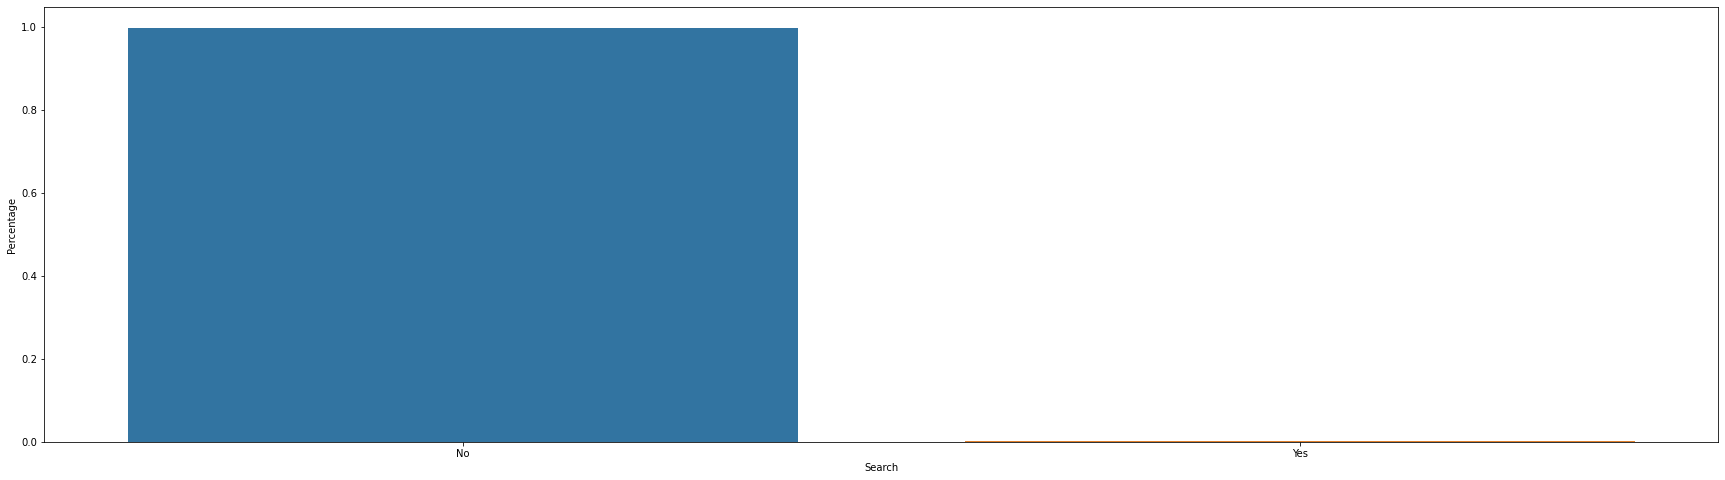

value share for Search


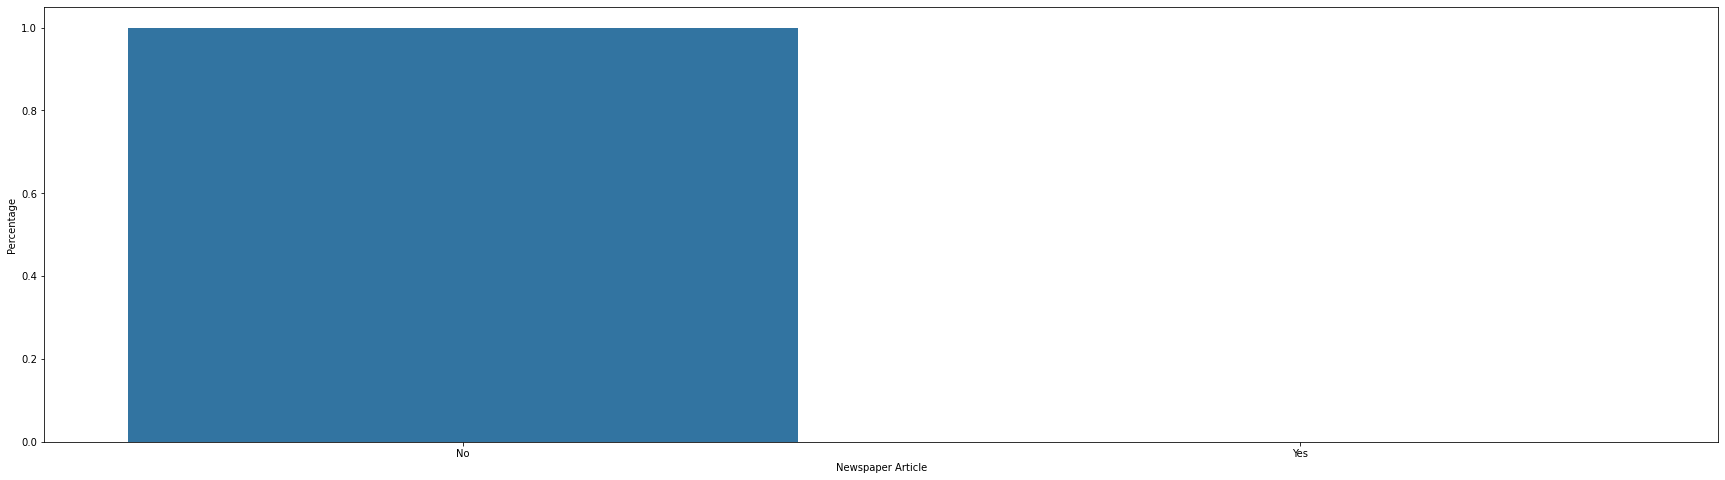

value share for Newspaper Article


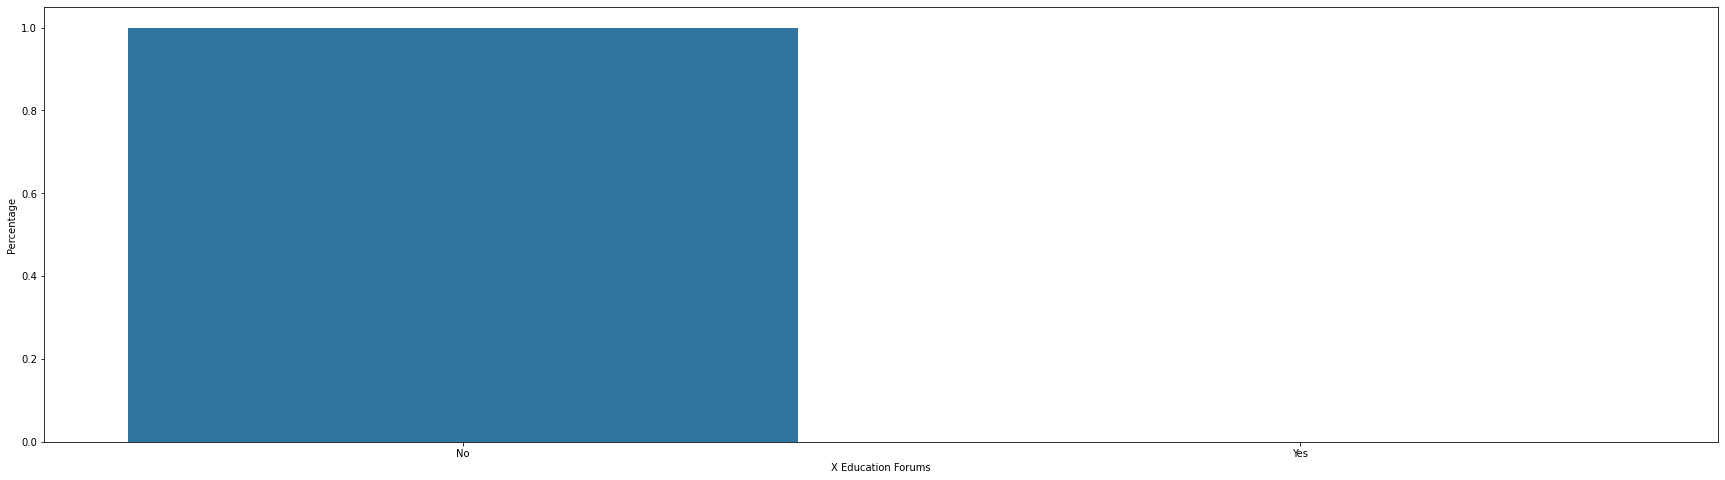

value share for X Education Forums


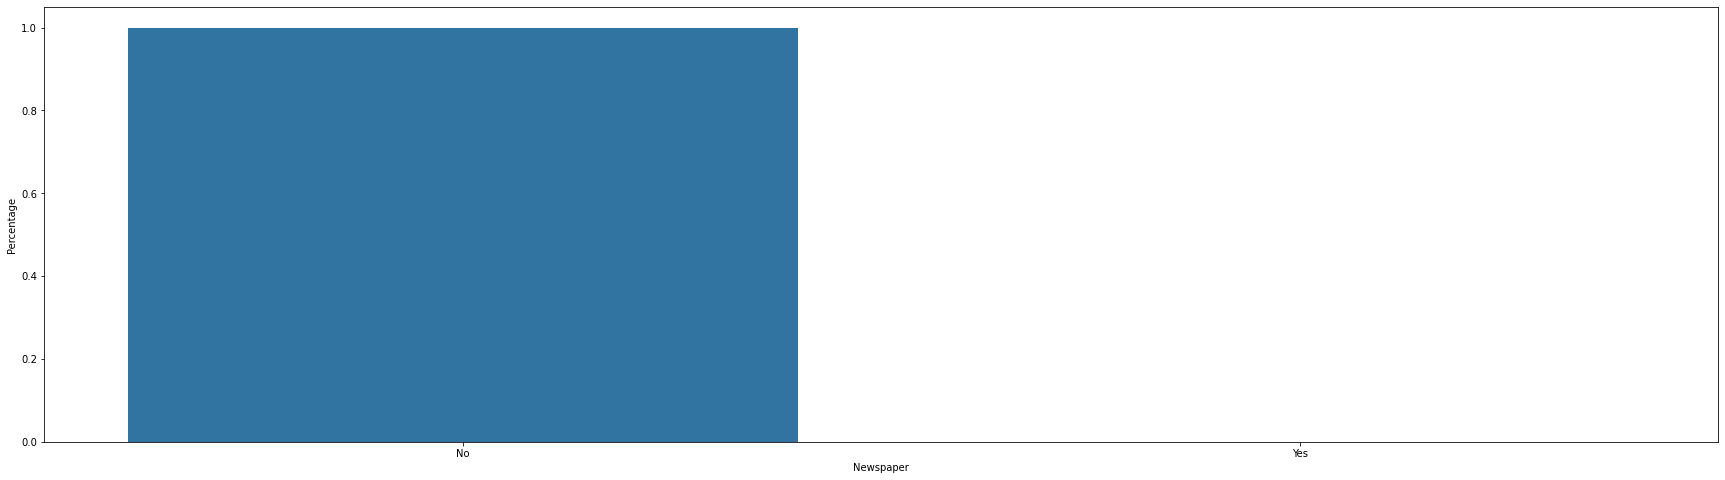

value share for Newspaper


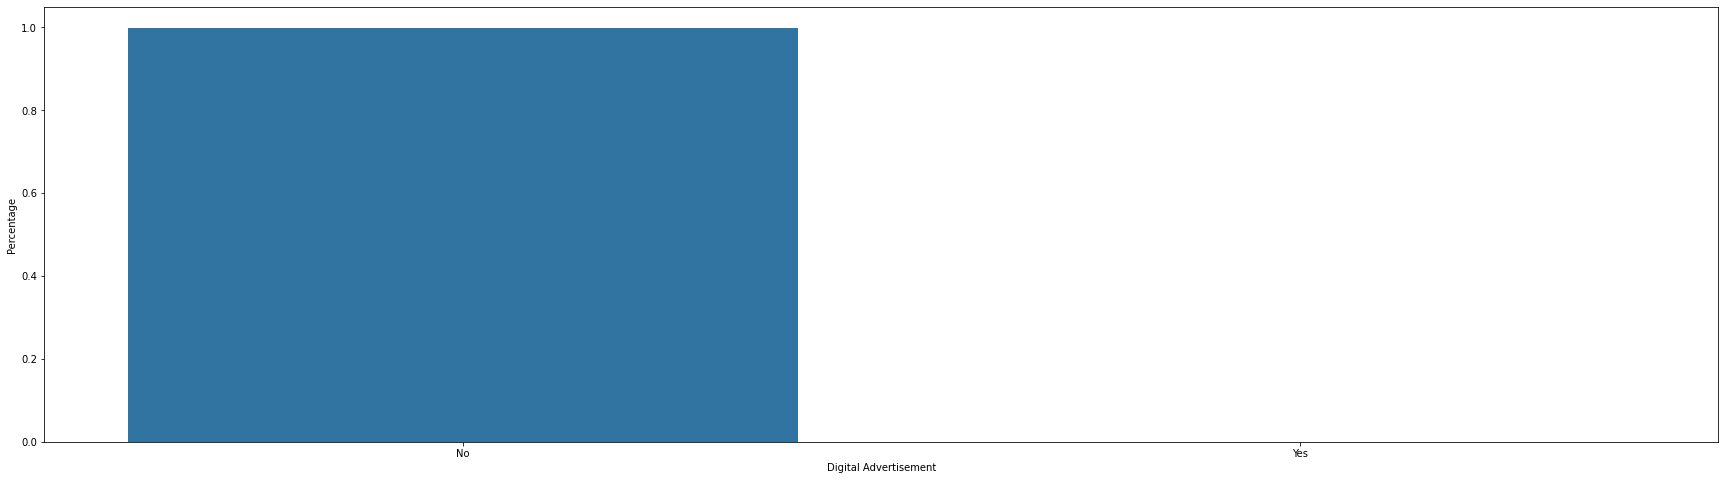

value share for Digital Advertisement


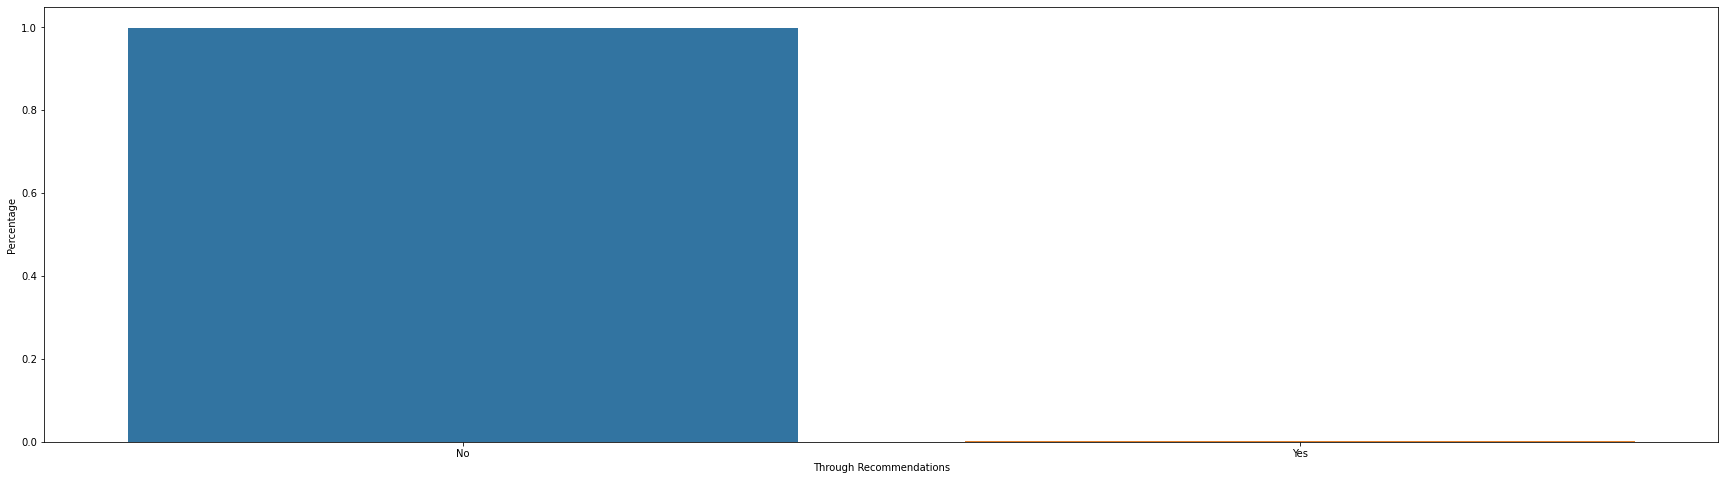

value share for Through Recommendations


In [17]:
# Lets look at percentage share of each value for every categorical feature
# We will delete features which have majorly same value across data (considering 98% threshold)
import matplotlib.pyplot as plt
import seaborn as sns
threshold = 0.98
majority_drop_list = []
for col in cat_ftrs:
    temp_df = (df_leads_cleaned[col].value_counts(normalize=True)).reset_index()
    temp_df.columns = [col, 'Percentage']
    check_df = temp_df[temp_df['Percentage'] >= threshold]
    # only plotting if we have majority value all across
    if check_df.shape[0] > 0:
        plt.rcParams["figure.figsize"] = (30,8)
        g = sns.barplot(x = col,
                y = 'Percentage',
                data = temp_df)
        plt.show()
        print("value share for {}".format(col))
        majority_drop_list.append(col)

In [18]:
# dropping features with majority same value throught all records
print(majority_drop_list)
df_leads_cleaned.drop(columns=majority_drop_list, inplace=True)
cat_ftrs = [col for col in cat_ftrs if col not in majority_drop_list]
print(len(cat_ftrs))

['Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']
16


Hanlding country feature, categorising everything into "Others" with share very less

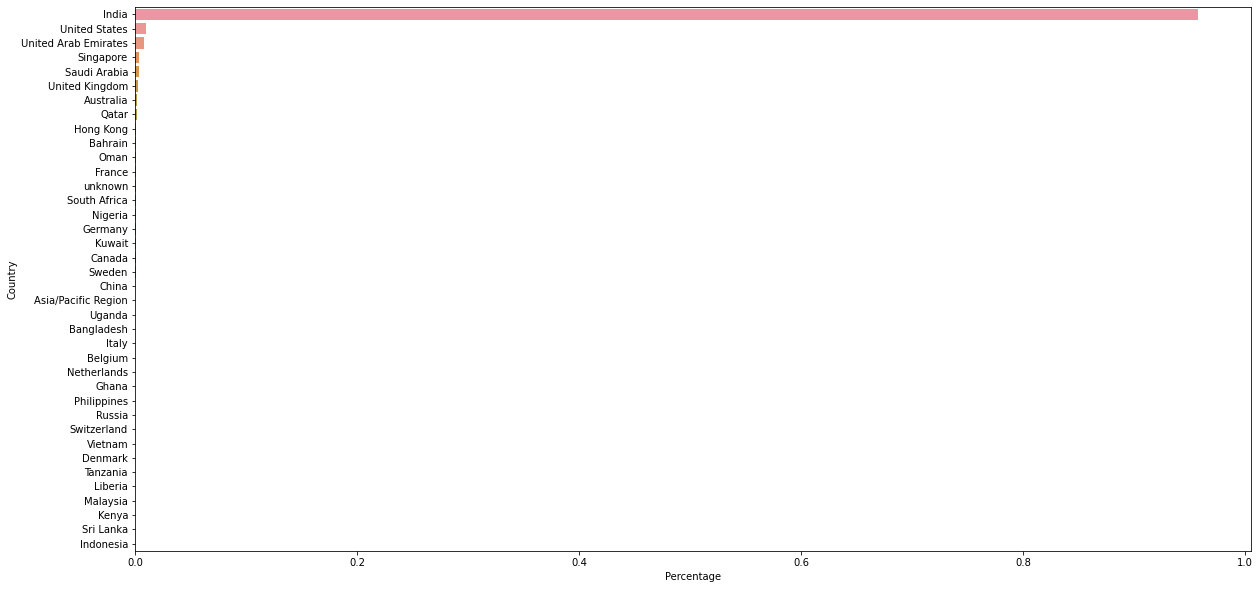

In [19]:
col = "Country"
temp_df = (df_leads_cleaned[col].value_counts(normalize=True)).reset_index()
temp_df.columns = [col, 'Percentage']
temp_df.sort_values(by='Percentage')
plt.rcParams["figure.figsize"] = (20,10)
sns.barplot(y=col, x="Percentage", data=temp_df, orient='h')
plt.show()

In [20]:
# as can be seen most of the countries have very less share, lets look at percentage 
temp_df.head(8)

,Country,Percentage
0,India,0.957663
1,United States,0.010178
2,United Arab Emirates,0.007818
3,Singapore,0.003540
4,Saudi Arabia,0.003098
5,United Kingdom,0.002213
6,Australia,0.001918
7,Qatar,0.001475


<AxesSubplot:ylabel='Lead_share'>

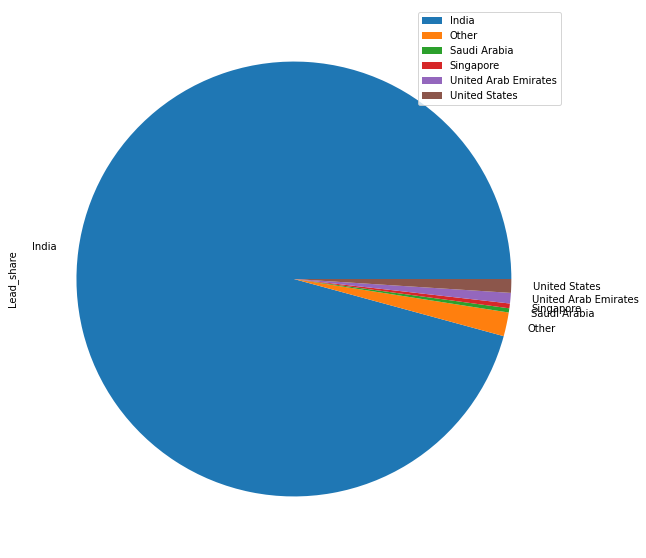

In [21]:
# tagging everything below share 0.002 into Others
Other_countries = list((temp_df[temp_df['Percentage'] < 0.003])['Country'].unique())
df_leads_cleaned['Country'] = np.where(df_leads_cleaned['Country'].isin(Other_countries), "Other", df_leads_cleaned['Country'])
Country_share = (pd.DataFrame(df_leads_cleaned['Country'].value_counts())).reset_index()
Country_share.columns = ['Country', 'Lead_share']
Country_share.groupby(['Country']).sum().plot(kind='pie', y='Lead_share')
# plt.Country_share.pieplot()
# plt.show()

Converting some binary variables (Yes/No) to 0/1

In [22]:
# List of variables to map
binary_varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the binary features
df_leads_cleaned[binary_varlist] = df_leads_cleaned[binary_varlist].apply(binary_map)

# Getting multilabel categorical variables
multi_varlist = [col for col in cat_ftrs if col not in binary_varlist]
print("Multilabel features: ", len(multi_varlist), "Binary label features: ", len(binary_varlist))

Multilabel features:  14 Binary label features:  2


For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [23]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_variables = pd.get_dummies(df_leads_cleaned[multi_varlist], drop_first=True)

# Adding the results to the master dataframe
df_leads_cleaned = pd.concat([df_leads_cleaned, dummy_variables], axis=1)
df_leads_cleaned.drop(columns=multi_varlist, inplace=True)

In [24]:
# Checking dimensions of updated data
print(df_leads_cleaned.shape)

# Checking updated list of categorical features
cat_ftrs = list((df_leads_cleaned.select_dtypes(include=["object_"])).columns)
print(cat_ftrs)

(9240, 141)
[]


Handling Missing Data

In [25]:
# lets look at percentage of missing data for each feature
mssng_data = pd.DataFrame(round(100*(df_leads_cleaned.isnull().sum()/len(df_leads_cleaned.index)), 2)).reset_index()
mssng_data.columns = ['Column_name','percentage_missing']
mssng_data[mssng_data['percentage_missing'] > 0]
mssng_col_list = list((mssng_data[mssng_data['percentage_missing'] > 0]).Column_name.unique())

In [26]:
# For all numerical columns, lets look at mean, mode & median value
for col in mssng_col_list:
    print("{} : mean - {}, mode - {}, median - {}".format(col, df_leads_cleaned[col].mean(),
                                                          (df_leads_cleaned[col].mode())[0], df_leads_cleaned[col].median()))

TotalVisits : mean - 3.445237833681204, mode - 0.0, median - 3.0
Page Views Per Visit : mean - 2.3628199494672093, mode - 0.0, median - 2.0
Asymmetrique Activity Score : mean - 14.306252489048187, mode - 14.0, median - 14.0
Asymmetrique Profile Score : mean - 16.344882516925527, mode - 15.0, median - 16.0


In [27]:
# for each of these mean & median are quite close therefore replacing all missing values with median itself
for col in mssng_col_list:
    df_leads_cleaned[col] = df_leads_cleaned[col].fillna(df_leads_cleaned[col].median())

Outlier Treatment

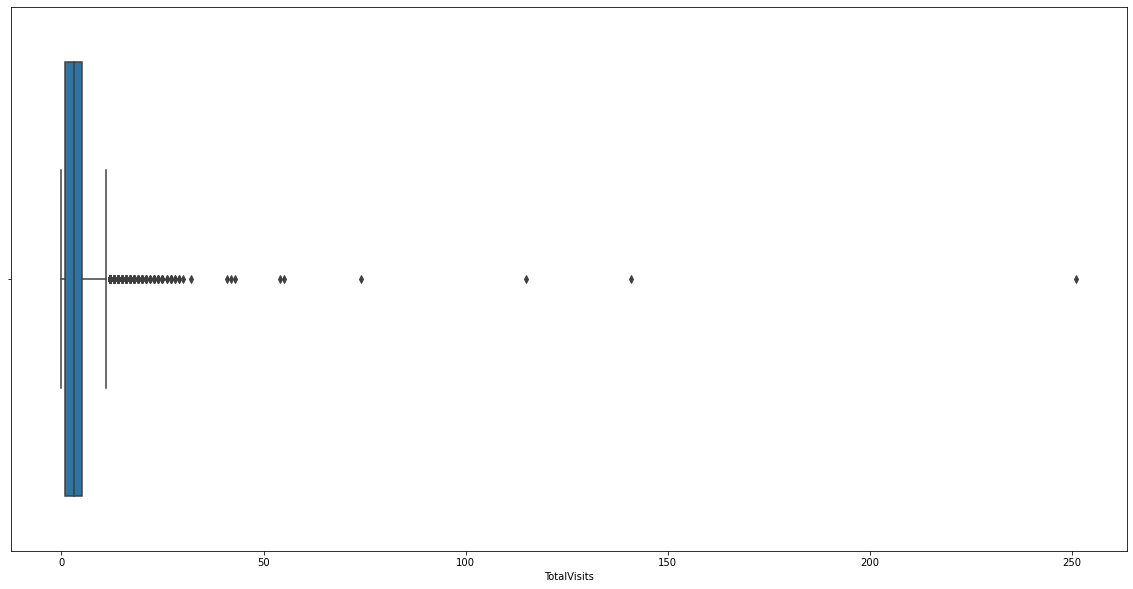

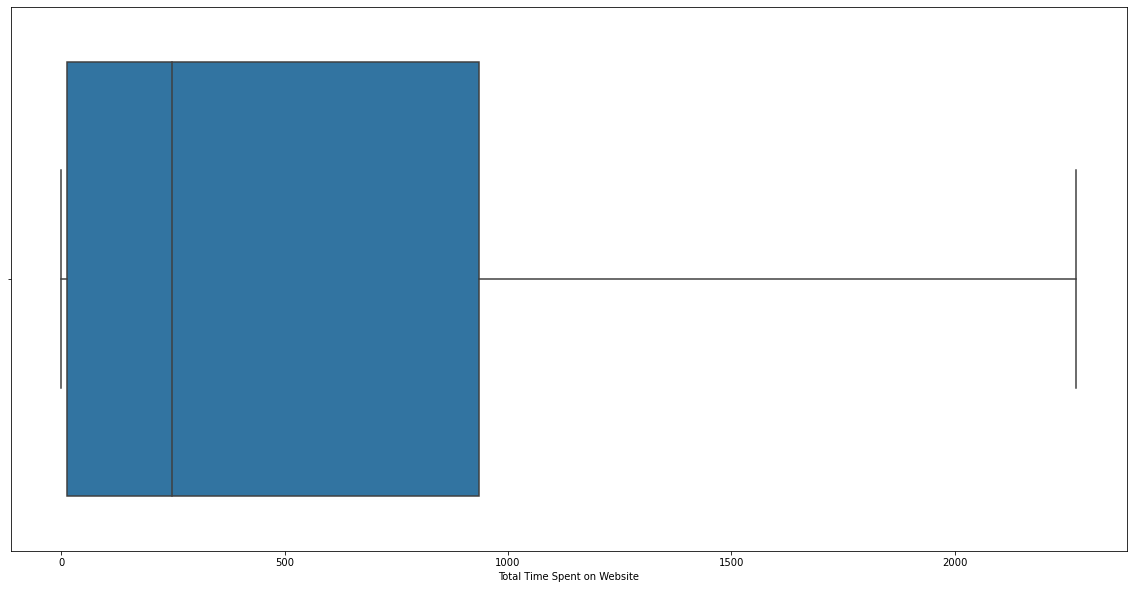

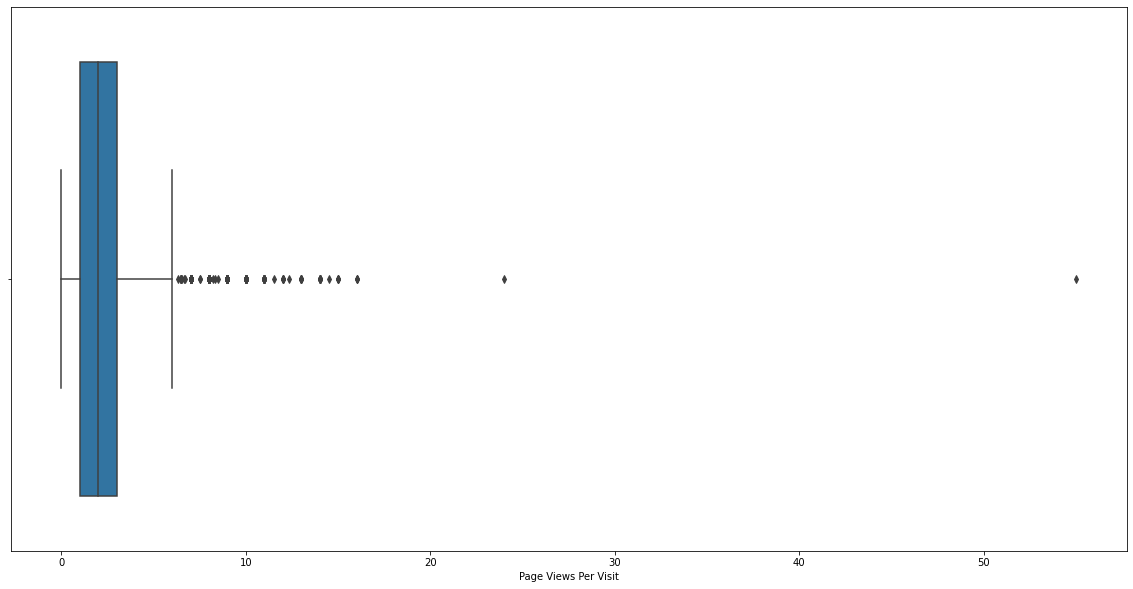

In [28]:
# checking outliers in all features where we saw huge difference between 75% and max
outlier_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for col in outlier_cols:
    sns.boxplot(x=df_leads_cleaned[col])
    plt.show()

It can be seen that there are may outliers in these features but as this is coming from actual data therefore dropping, normalizing or replacing these values won't be wise. these might result in actual impact towards Conversion

## Train-Test split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
prediction_feature = "Converted"
lead_id = "Lead Number"
X = df_leads_cleaned.drop([lead_id], axis=1)
X = X.drop([prediction_feature], axis=1)
X.shape

(9240, 139)

In [31]:
y = df_leads_cleaned[prediction_feature]
y.shape

(9240,)

In [32]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
numerical_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Other,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable A

In [35]:
### Checking the Conversion Rate
conversion_rate = (sum(df_leads_cleaned['Converted'])/len(df_leads_cleaned['Converted'].index))*100
print("Current conversion rate is : {}".format(round(conversion_rate,2)))

Current conversion rate is : 38.54


## Looking at Correlations

Correlation to see if some features have very high correlation amongst themselves which might lead into overfitting, through we will use VIF while model fitting but this is just to have an idea

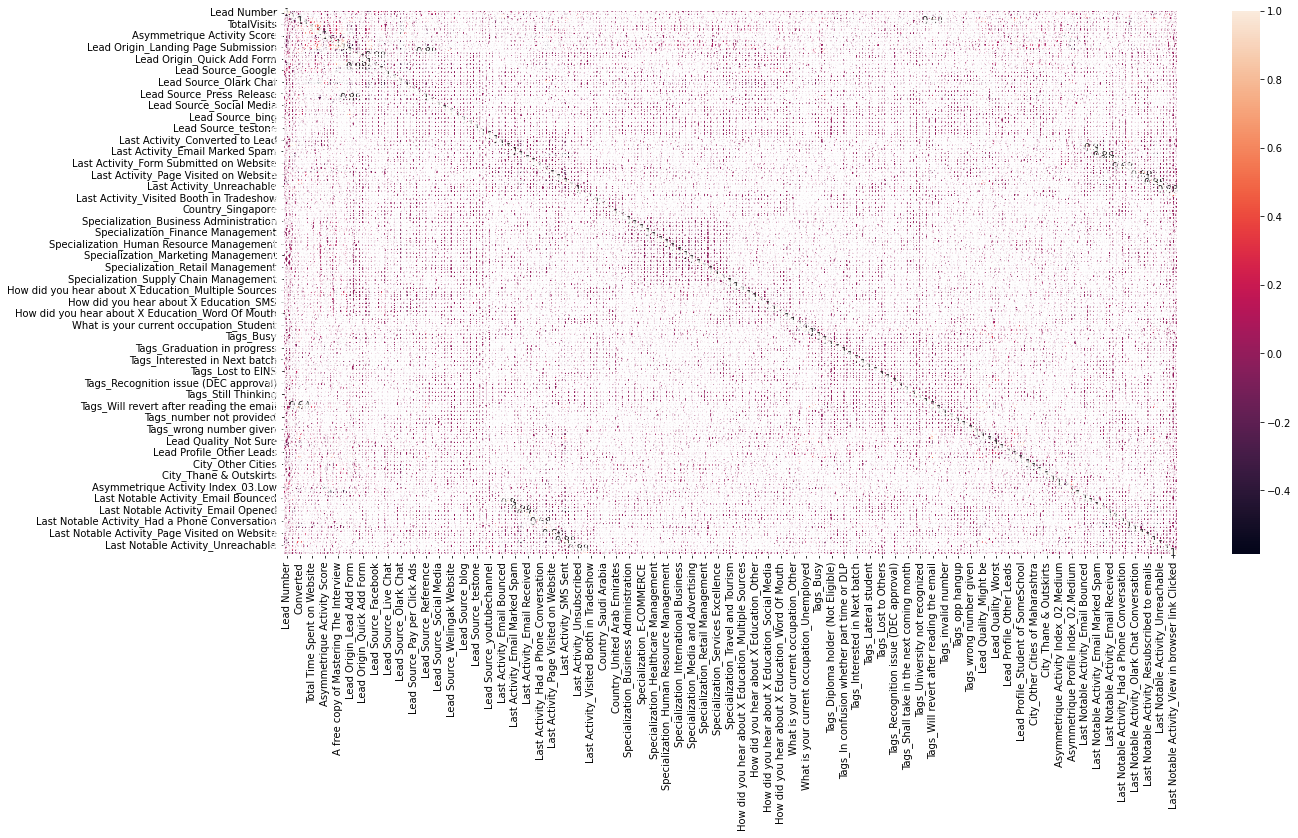

In [36]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_leads_cleaned.corr(),annot = True)
plt.show()

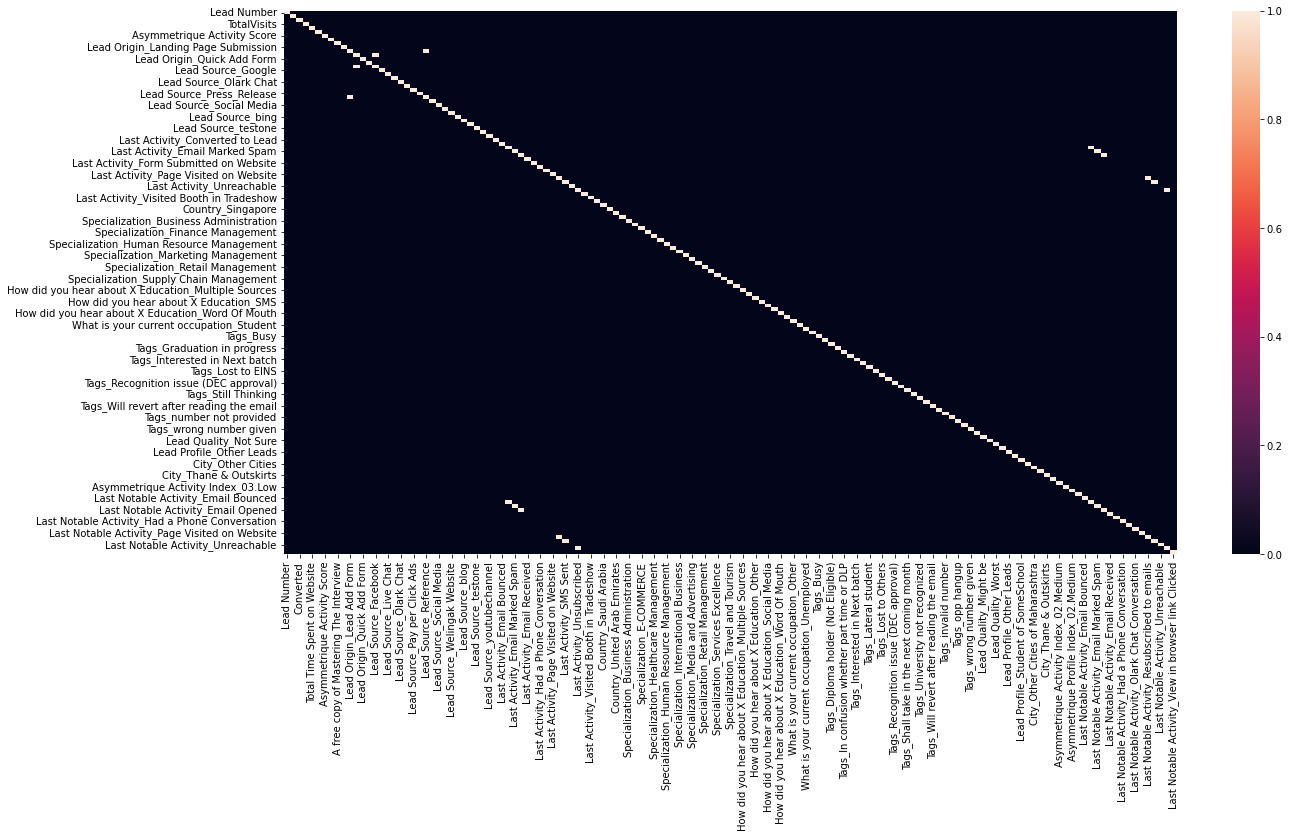

In [37]:
plt.figure(figsize = (20,10)) 
sns.heatmap(df_leads_cleaned.corr() > 0.8)
plt.show()

Surely there are some highly correlative relationships but for now lets leave those as it as we can cater to them with VIF later

## Model Building

### Feature Selection Using RFE

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [39]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 9),
 ('TotalVisits', False, 81),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 105),
 ('Asymmetrique Activity Score', False, 26),
 ('Asymmetrique Profile Score', False, 56),
 ('A free copy of Mastering The Interview', False, 99),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', False, 10),
 ('Lead Origin_Lead Import', False, 62),
 ('Lead Origin_Quick Add Form', False, 82),
 ('Lead Source_Direct Traffic', False, 67),
 ('Lead Source_Facebook', False, 43),
 ('Lead Source_Google', False, 70),
 ('Lead Source_Live Chat', False, 118),
 ('Lead Source_NC_EDM', False, 11),
 ('Lead Source_Olark Chat', False, 41),
 ('Lead Source_Organic Search', False, 68),
 ('Lead Source_Pay per Click Ads', False, 113),
 ('Lead Source_Press_Release', False, 84),
 ('Lead Source_Reference', False, 27),
 ('Lead Source_Referral Sites', False, 59),
 ('Lead Source_Social Media', False, 97),
 ('Lead Source_WeLearn', False, 111),
 (

In [41]:
rfe_selected_col = X_train.columns[rfe.support_ == True]

### Model building and backward elimination with statsmodel

In [42]:
import statsmodels.api as sm

In [43]:
X_train_first = sm.add_constant(X_train[rfe_selected_col])
X_test_first = sm.add_constant(X_test[rfe_selected_col])
logm1 = sm.GLM(y_train,X_train_first, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1331.8
Date:                Sun, 08 Jan 2023   Deviance:                       2663.7
Time:                        21:17:28   Pearson chi2:                 1.80e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0200      0.095    -21.286      0.000      -2.206      -1.834
Lead Source_Welingak Website                             3.6895      0.751      4.912      0.000       2.217       5.162
Last Activity_SMS Sent                                   2.1721      0.114     19.024      0.000       1.948       2.396
What is your current occupation_Unemployed               1.6906      0.114     14.813      0.000       1.467       1.914
What is your current occupation_Working Professional     1.9489      0.331      5.880      0.000       1.299       2.598
Tags_Closed by Horizzon                                  7.0996      1.012      7.015      0.000       5.116       9.083
Tags_Diploma holder (Not Eligible)                     -23.1531   1.73e+04     -0.001      0.999    -3.4e+04     3.4e+04
Tags_Interested  in full time MBA                       -2.3706      0.736     -3.221      0.001      -3.813      -0.928
Tags_Interested in other courses                        -2.3569      0.336     -7.013      0.000      -3.016      -1.698
Tags_Lost to EINS                                        7.0025      0.818      8.557      0.000       5.399       8.606
Tags_Not doing further education                        -3.3805      1.044     -3.237      0.001      -5.427      -1.334
Tags_Ringing                                            -4.3673      0.235    -18.616      0.000      -4.827      -3.907
Tags_Will revert after reading the email                 3.8713      0.189     20.519      0.000       3.502       4.241
Tags_invalid number                                     -4.6199      1.031     -4.479      0.000      -6.642      -2.598
Tags_number not provided                               -24.8545   2.48e+04     -0.001      0.999   -4.86e+04    4.86e+04
Tags_opp hangup                                         -2.8657      0.806     -3.555      0.000      -4.445      -1.286
Tags_switched off                                       -4.8085      0.524     -9.174      0.000      -5.836      -3.781
Tags_wrong number given                                -25.0255   2.08e+04     -0.001      0.999   -4.09e+04    4.08e+04
Lead Quality_Worst                                      -3.3311      0.547     -6.091      0.000      -4.403      -2.259
Last Notable Activity_Email Link Clicked                -1.3546      0.464     -2.920      0.003      -2.264      -0.445
Last Notable Activity_Modified                          -1.6396      0.120    -13.665      0.000      -1.875      -1.404
========================================================================================================================
"""

In [44]:
# Getting the predicted values on the train set
y_train_first_pred = res.predict(X_train_first)
y_train_first_pred[:10]

1871    0.009042
6795    0.418370
3516    0.009042
8105    0.074150
3934    0.122492
4844    0.997458
3297    0.009042
8071    0.995454
987     0.025096
7423    0.996711
dtype: float64

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [45]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_first_pred})
y_train_pred_final['Lead Number'] = df_leads_cleaned['Lead Number']
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
1871,0,0.009042,641410
6795,0,0.418370,597687
3516,0,0.009042,626825
8105,0,0.074150,587928
3934,0,0.122492,622366


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0 (this is just to refine the model at the end we will use ROC curve and sensitivity-specificity to get this threshold

In [46]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
1871,0,0.009042,641410,0
6795,0,0.418370,597687,0
3516,0,0.009042,626825,0
8105,0,0.074150,587928,0
3934,0,0.122492,622366,0


In [47]:
from sklearn import metrics

In [48]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3831  171]
 [ 320 2146]]


In [49]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9240878169449598


#### Checking VIF and second iteration

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_selected_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_selected_col].values, i) for i in range(X_train[rfe_selected_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.28
15,Tags_switched off,1.18
9,Tags_Not doing further education,1.17
6,Tags_Interested in full time MBA,1.08
0,Lead Source_Welingak Website,1.07
8,Tags_Lost to EINS,1.06
12,Tags_invalid number,1.06
5,Tags_Diploma holder (Not Eligible),1.05
16,Tags_wrong number given,1.03
18,Last Notable Activity_Email Link Clicked,1.02


For all features VIF seems in check considering <5 criteria, therefore using p-value obtained in model statistics implies insignificant features,therefore we will try to delete those and see the impact

In [52]:
rfe_selected_col = rfe_selected_col.drop('Tags_number not provided', 1)
len(rfe_selected_col)

19

In [53]:
# Let's re-run the model using the selected variables
X_train_second = sm.add_constant(X_train[rfe_selected_col])
X_test_second = sm.add_constant(X_test[rfe_selected_col])
logm2 = sm.GLM(y_train,X_train_second, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1346.1
Date:                Sun, 08 Jan 2023   Deviance:                       2692.1
Time:                        21:17:28   Pearson chi2:                 1.74e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0130      0.095    -21.297      0.000      -2.198      -1.828
Lead Source_Welingak Website                             3.7371      0.750      4.980      0.000       2.266       5.208
Last Activity_SMS Sent                                   2.1421      0.113     18.975      0.000       1.921       2.363
What is your current occupation_Unemployed               1.6313      0.113     14.422      0.000       1.410       1.853
What is your current occupation_Working Professional     1.9117      0.332      5.766      0.000       1.262       2.562
Tags_Closed by Horizzon                                  7.1237      1.012      7.040      0.000       5.141       9.107
Tags_Diploma holder (Not Eligible)                     -23.1026   1.73e+04     -0.001      0.999    -3.4e+04     3.4e+04
Tags_Interested  in full time MBA                       -2.3217      0.736     -3.156      0.002      -3.764      -0.880
Tags_Interested in other courses                        -2.3033      0.335     -6.871      0.000      -2.960      -1.646
Tags_Lost to EINS                                        7.0105      0.819      8.559      0.000       5.405       8.616
Tags_Not doing further education                        -3.3198      1.043     -3.183      0.001      -5.364      -1.275
Tags_Ringing                                            -4.2907      0.233    -18.383      0.000      -4.748      -3.833
Tags_Will revert after reading the email                 3.9045      0.188     20.761      0.000       3.536       4.273
Tags_invalid number                                     -4.5432      1.031     -4.407      0.000      -6.564      -2.523
Tags_opp hangup                                         -2.7917      0.805     -3.470      0.001      -4.369      -1.215
Tags_switched off                                       -4.7301      0.524     -9.035      0.000      -5.756      -3.704
Tags_wrong number given                                -24.9508   2.09e+04     -0.001      0.999   -4.09e+04    4.09e+04
Lead Quality_Worst                                      -3.3451      0.547     -6.114      0.000      -4.417      -2.273
Last Notable Activity_Email Link Clicked                -1.3668      0.461     -2.964      0.003      -2.271      -0.463
Last Notable Activity_Modified                          -1.6223      0.119    -13.589      0.000      -1.856      -1.388
========================================================================================================================
"""

In [54]:
y_train_second_pred = res.predict(X_train_second)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_second_pred})
y_train_pred_final['Lead Number'] = df_leads_cleaned['Lead Number']
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3826  176]
 [ 320 2146]]
0.9233147804576376


#### Accuracy still seems good so its okay to have dropped that variable, lets check VIF again

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_selected_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_selected_col].values, i) for i in range(X_train[rfe_selected_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.28
14,Tags_switched off,1.18
9,Tags_Not doing further education,1.16
6,Tags_Interested in full time MBA,1.08
0,Lead Source_Welingak Website,1.07
8,Tags_Lost to EINS,1.06
12,Tags_invalid number,1.06
5,Tags_Diploma holder (Not Eligible),1.05
15,Tags_wrong number given,1.03
13,Tags_opp hangup,1.02


#### VIF seems okay but there are quite a few features with very high p-value which depicts they are not significant. Lets drop them one by one to see the impact

In [56]:
rfe_selected_col = rfe_selected_col.drop('Tags_Diploma holder (Not Eligible)', 1)
len(rfe_selected_col)

18

#### Third iteration

In [57]:
# Let's re-run the model using the selected variables
X_train_third = sm.add_constant(X_train[rfe_selected_col])
X_test_third = sm.add_constant(X_test[rfe_selected_col])
logm3 = sm.GLM(y_train,X_train_third, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1356.2
Date:                Sun, 08 Jan 2023   Deviance:                       2712.4
Time:                        21:17:29   Pearson chi2:                 1.76e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0226      0.095    -21.363      0.000      -2.208      -1.837
Lead Source_Welingak Website                             3.8010      0.751      5.063      0.000       2.330       5.273
Last Activity_SMS Sent                                   2.1649      0.113     19.235      0.000       1.944       2.386
What is your current occupation_Unemployed               1.5793      0.112     14.038      0.000       1.359       1.800
What is your current occupation_Working Professional     1.8805      0.332      5.668      0.000       1.230       2.531
Tags_Closed by Horizzon                                  7.1798      1.012      7.097      0.000       5.197       9.163
Tags_Interested  in full time MBA                       -2.2644      0.736     -3.077      0.002      -3.707      -0.822
Tags_Interested in other courses                        -2.2463      0.335     -6.699      0.000      -2.904      -1.589
Tags_Lost to EINS                                        7.0560      0.820      8.601      0.000       5.448       8.664
Tags_Not doing further education                        -3.2650      1.044     -3.128      0.002      -5.311      -1.219
Tags_Ringing                                            -4.2480      0.233    -18.227      0.000      -4.705      -3.791
Tags_Will revert after reading the email                 3.9571      0.188     21.073      0.000       3.589       4.325
Tags_invalid number                                     -4.4999      1.031     -4.364      0.000      -6.521      -2.479
Tags_opp hangup                                         -2.7464      0.805     -3.410      0.001      -4.325      -1.168
Tags_switched off                                       -4.6886      0.523     -8.958      0.000      -5.714      -3.663
Tags_wrong number given                                -23.9039   1.26e+04     -0.002      0.998   -2.48e+04    2.47e+04
Lead Quality_Worst                                      -3.3693      0.545     -6.180      0.000      -4.438      -2.301
Last Notable Activity_Email Link Clicked                -1.3989      0.457     -3.060      0.002      -2.295      -0.503
Last Notable Activity_Modified                          -1.6295      0.119    -13.682      0.000      -1.863      -1.396
========================================================================================================================
"""

In [58]:
y_train_third_pred = res.predict(X_train_third)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_third_pred})
y_train_pred_final['Lead Number'] = df_leads_cleaned['Lead Number']
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3825  177]
 [ 320 2146]]
0.9231601731601732


#### Accuracy is unchanged so its good to have removed the feature

#### Fourth Iteration

In [59]:
rfe_selected_col = rfe_selected_col.drop('Tags_wrong number given', 1)
len(rfe_selected_col)

17

In [60]:
# Let's re-run the model using the selected variables
X_train_fourth = sm.add_constant(X_train[rfe_selected_col])
X_test_fourth = sm.add_constant(X_test[rfe_selected_col])
logm4 = sm.GLM(y_train,X_train_fourth, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1378.7
Date:                Sun, 08 Jan 2023   Deviance:                       2757.4
Time:                        21:17:29   Pearson chi2:                 1.66e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0046      0.094    -21.367      0.000      -2.188      -1.821
Lead Source_Welingak Website                             3.8748      0.750      5.168      0.000       2.405       5.344
Last Activity_SMS Sent                                   2.1076      0.110     19.078      0.000       1.891       2.324
What is your current occupation_Unemployed               1.4865      0.111     13.402      0.000       1.269       1.704
What is your current occupation_Working Professional     1.8216      0.332      5.487      0.000       1.171       2.472
Tags_Closed by Horizzon                                  7.2200      1.011      7.139      0.000       5.238       9.202
Tags_Interested  in full time MBA                       -2.1883      0.735     -2.976      0.003      -3.629      -0.747
Tags_Interested in other courses                        -2.1634      0.334     -6.478      0.000      -2.818      -1.509
Tags_Lost to EINS                                        7.0615      0.820      8.613      0.000       5.455       8.668
Tags_Not doing further education                        -3.1714      1.042     -3.045      0.002      -5.213      -1.130
Tags_Ringing                                            -4.1262      0.231    -17.853      0.000      -4.579      -3.673
Tags_Will revert after reading the email                 4.0083      0.187     21.427      0.000       3.642       4.375
Tags_invalid number                                     -4.3782      1.030     -4.250      0.000      -6.397      -2.359
Tags_opp hangup                                         -2.6299      0.803     -3.276      0.001      -4.203      -1.056
Tags_switched off                                       -4.5636      0.522     -8.736      0.000      -5.587      -3.540
Lead Quality_Worst                                      -3.3695      0.545     -6.187      0.000      -4.437      -2.302
Last Notable Activity_Email Link Clicked                -1.4002      0.456     -3.073      0.002      -2.293      -0.507
Last Notable Activity_Modified                          -1.6123      0.118    -13.618      0.000      -1.844      -1.380
========================================================================================================================
"""

In [61]:
y_train_fourth_pred = res.predict(X_train_fourth)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_fourth_pred})
y_train_pred_final['Lead Number'] = df_leads_cleaned['Lead Number']
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3837  165]
 [ 338 2128]]
0.9222325293753865


#### This seems like a good model, training accuracy appears to be too good so we should surely look into test accuracy and might have to adjust the cut-off as business problem. Another reason might be that initial conversion ratio itself was 38%. Lets continue with model validation

## Model Validation

In [62]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [63]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity: ",TP / float(TP+FN))
# Let us calculate specificity
print("Specificity: ",TN / float(TN+FP))
# positive predictive value 
print ("TPR: ", TP / float(TP+FP))
# Negative predictive value
print ("TNR: ", TN / float(TN+ FN))

Sensitivity:  0.8629359286293593
Specificity:  0.9587706146926537
TPR:  0.9280418665503707
TNR:  0.9190419161676646


## As our target is to identify Hot Leads which means we should not be losing out on customers who had high chances of converting but because we were not able to tag them as hot leads will leads to actual loss. Than means Recall = TP/TP+FN should be increased as much as possible. 

#### TP+FN is total possible hot leads, TP is hot leads tagged correctly

## As recall = Sensitvity and that is close to 86% as per 0.5 cut-off which means we are able to increase conversion rate to 86% by tagging 86% of all possible hot leads correctly

## Finding <u>optimal cut-off</u> as per interaction between sensitivity  & specificity

In [64]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.009525,641410,0,1,0,0,0,0,0,0,0,0,0
6795,0,0.373312,597687,0,1,1,1,1,0,0,0,0,0,0
3516,0,0.009525,626825,0,1,0,0,0,0,0,0,0,0,0
8105,0,0.073327,587928,0,1,0,0,0,0,0,0,0,0,0
3934,0,0.106183,622366,0,1,1,0,0,0,0,0,0,0,0


In [65]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.772882  0.976075  0.647676
0.2   0.2  0.913111  0.928629  0.903548
0.3   0.3  0.913729  0.928224  0.904798
0.4   0.4  0.921150  0.871452  0.951774
0.5   0.5  0.922233  0.862936  0.958771
0.6   0.6  0.913265  0.809813  0.977011
0.7   0.7  0.913111  0.809408  0.977011
0.8   0.8  0.913111  0.809408  0.977011
0.9   0.9  0.870439  0.673560  0.991754


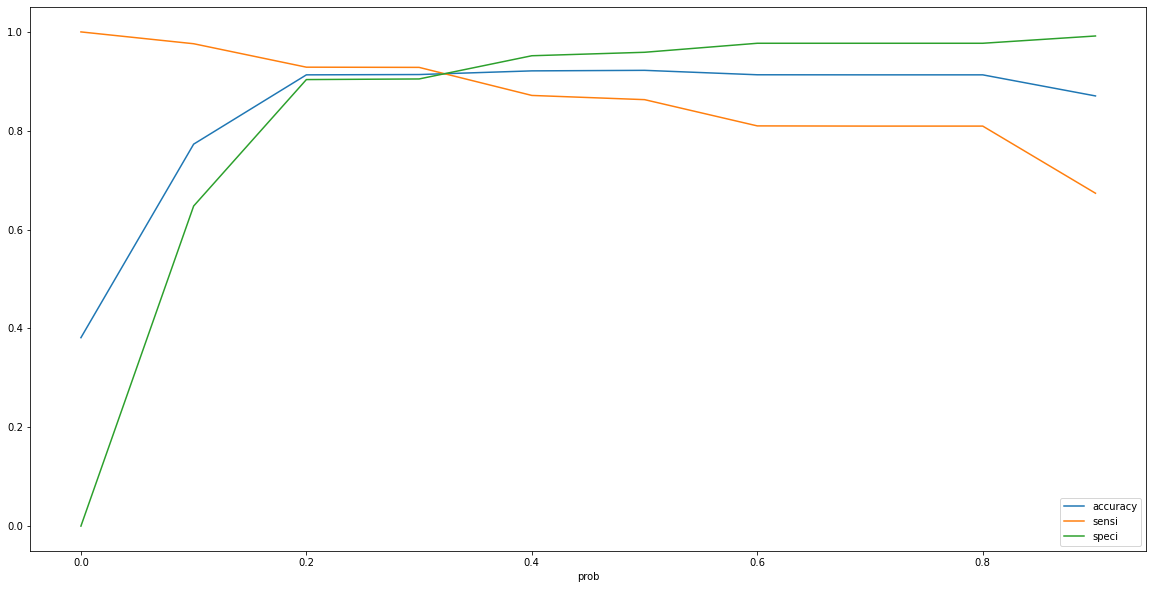

In [66]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, <u>0.35</u> is the optimum point to take it as a cutoff probability.

In [67]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,0,0.009525,641410,0,1,0,0,0,0,0,0,0,0,0,0
6795,0,0.373312,597687,0,1,1,1,1,0,0,0,0,0,0,1
3516,0,0.009525,626825,0,1,0,0,0,0,0,0,0,0,0,0
8105,0,0.073327,587928,0,1,0,0,0,0,0,0,0,0,0,0
3934,0,0.106183,622366,0,1,1,0,0,0,0,0,0,0,0,0


In [68]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9137291280148423

In [69]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3621,  381],
       [ 177, 2289]], dtype=int64)

In [70]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [71]:
# Let's see the sensitivity/ recall of our logistic regression model
TP / float(TP+FN)

0.9282238442822385

### After getting optimal cut-off our conversion rate or correct detection of hot leads has increased to <b>~93%</b>

#### Precision-Recall tradeoff

In [72]:
from sklearn.metrics import precision_recall_curve

In [73]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

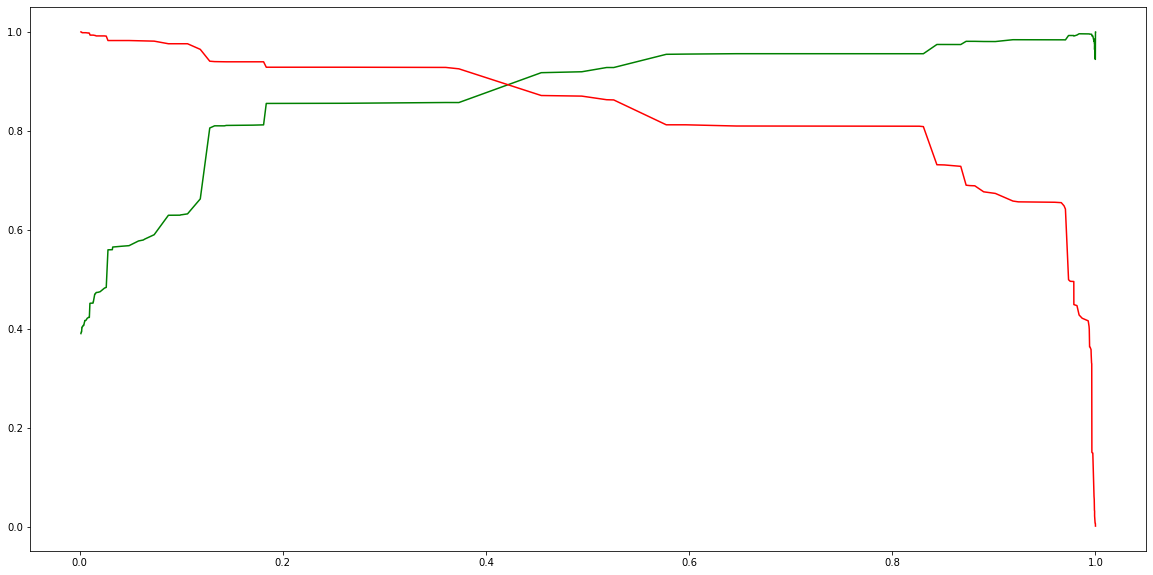

In [74]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Testing model on Test set

In [75]:
# Feature Scaling
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [76]:
# Retaining same columns from backward elimination into X_test data as well
X_test_final = X_test[rfe_selected_col]

In [77]:
# adding constant
X_test_final_sm = sm.add_constant(X_test_final)

In [78]:
y_test_pred = res.predict(X_test_final_sm)

In [79]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [80]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([pd.DataFrame(y_test), y_pred_1],axis=1)

In [81]:
y_pred_final.columns = ['Converted', 'Test_conversion_predicted']
y_pred_final.head()

,Converted,Test_conversion_predicted
4269,1,0.525733
2376,1,0.996308
7766,1,0.978655
9199,0,0.106183
4359,1,0.970410


In [82]:
# using same cut-off
y_pred_final['final_predicted'] = y_pred_final.Test_conversion_predicted.map(lambda x: 1 if x > 0.35 else 0)

In [83]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9148629148629148

In [84]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1504,  173],
       [  63, 1032]], dtype=int64)

In [85]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [86]:
# Let's see the sensitivity/ recall of our logistic regression model
TP / float(TP+FN)

0.9424657534246575

# This seems like a great model to accuractely predict as many hot leads as possible correctly. As we can see in train data we are able to correctly identify the hot-leads by 93% and for test-data by 94%

### Also, as per model statistics, <u>most significant 5 features</u> impacting conversion are : Tags_Closed by Horizzon, Tags_Lost to EINS, Tags_switched off,  Tags_invalid number and Tags_Ringing

<u><b>Most significant 3 features with positive impact </u></b>:  Tags_Closed by Horizzon, Tags_Lost to EINS, Tags_Will revert after reading the email <br>
<u><b>Most significant 3 features with negative impact </u></b>:  Tags_switched off, Tags_invalid number, Tags_Ringing

<font color=blue>That means of the prospects current status is Switched off, Invalid or Ringing that means there are high chances of non conversion, <br> However if the status is Horizzon, EINS or will revert after reading the email that means there are high chances of conversion</color>